In [1]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Загрузка датасета
data = tf.keras.datasets.mnist.load_data()

data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# Создание массива признаков
x1 = data[0][0]
x2 = data[1][0]
x = np.vstack([x1, x2])
x = np.reshape(x, [-1, 28 * 28])
x = pd.DataFrame(x)


# Нормировка значений признаков
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)


# Создание массива значений классов
y1 = np.reshape(data[0][1], [-1, 1])
y2 = np.reshape(data[1][1], [-1, 1])
y = np.vstack([y1, y2])
y = pd.DataFrame(y)

In [4]:
# Переведем массив со значениями классов в категориальный вид
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y)
y = encoder.transform(y).toarray()
y = pd.DataFrame(y)


# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.5, random_state=0)


# Преобразование данных в формат тензоров TensorFlow
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.float32)

In [5]:
# Задание конфигурации нейронной сети
n_input_neurons = np.shape(x_train)[1]
n_layer1_neurons = 128      # n_layer1_neurons = 32, 64, 128
n_layer2_neurons = 128      # n_layer2_neurons = 32, 64, 128
# n_layer3_neurons = 128    # n_layer3_neurons = 32, 64, 128
n_output_neurons = np.shape(y_train)[1]

In [6]:
# Установим начальные значения весов
initialize_weighs = tf.random.normal
initialize_bias = tf.random.normal


# Шаг 4


# Выберем функции активации нейронов
activation_layer1 = tf.nn.relu
activation_layer2 = tf.nn.relu
activation_output = tf.nn.softmax


# Шаг 5


# Выберем алгоритм градиентного спуска и настроим его
s_batch = 50          # s_batch = 100, 500, 1000
learn_rate = 0.001    # learn_rate = 0.5, 0.05, 0.005
n_epochs = 10
optimizer = tf.optimizers.Adam(learning_rate=learn_rate)


In [7]:
# Выбираем функцию потерь для отслеживания ошибки во время обучения
loss_function = tf.losses.categorical_crossentropy


# Выбираем функцию ошибки для отслеживания точности модели во время обучения
accuracy = tf.metrics.CategoricalAccuracy()


# Создадим модель
Model = Sequential()

In [8]:
# Добавим в нашу модель слои, мы указали 2 промежуточных слоя
Model.add(Dense(n_layer1_neurons, activation=activation_layer1, name='layer1'))
Model.add(Dense(n_layer2_neurons, activation=activation_layer2, name='layer2'))
Model.add(Dense(n_output_neurons, activation=activation_output, name='output'))
Model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8385 - loss: 0.5573
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9587 - loss: 0.1411
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9723 - loss: 0.0889
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9803 - loss: 0.0624
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9855 - loss: 0.0459
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9890 - loss: 0.0352
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9905 - loss: 0.0278
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9929 - loss: 0.0221
Epoch 9/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9936 - loss: 0.0195
Epoch 10/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9941 - loss: 0.0169


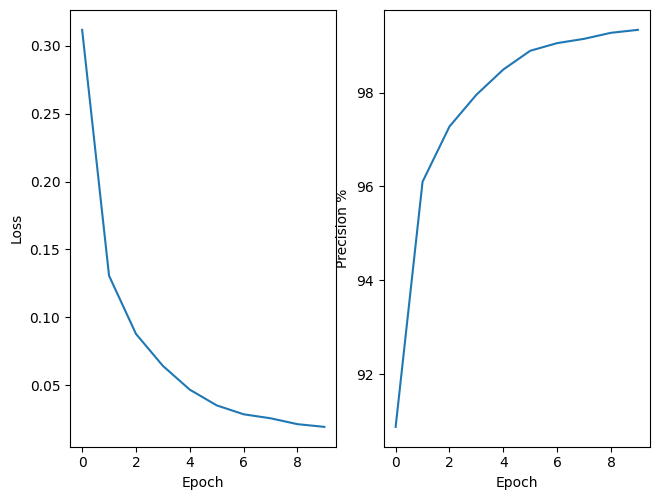

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9965 - loss: 0.0123
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9724 - loss: 0.1157


'Точность модели на тренировочной выборке = 99.6314287185669 %'

'Точность модели на тестовой выборке = 97.24000096321106 %'

In [9]:
# Запустим обучение созданной нами модели
model_train = Model.fit(x_train, y_train, batch_size=s_batch, epochs=n_epochs)


# Первым делом посмотрим, как шел процесс обучения, то есть как
# изменялась функция потерь и точность модели
loss = np.array(model_train.history['loss'])
accur = np.array(model_train.history['categorical_accuracy'])*100


fig1 = plt.figure()
axs1 = fig1.add_subplot(1, 2, 1, xlabel='Epoch', ylabel='Loss')
gph1 = axs1.plot(loss)
axs2 = fig1.add_subplot(1, 2, 2, xlabel='Epoch', ylabel='Precision %')
gph2 = axs2.plot(accur)
plt.tight_layout(pad=0)
plt.show()


# Оценка эффективности нейронной сети обучающей и тестовой выборке
accur_train = Model.evaluate(x_train, y_train)[1]*100
accur_test = Model.evaluate(x_test, y_test)[1]*100
display(f'Точность модели на тренировочной выборке = {accur_train} %')
display(f'Точность модели на тестовой выборке = {accur_test} %')
